# Explore here

In [32]:
# PARA HACER LAS EXPLORACIONES DE LOS DATOS
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')
df.head() #PARA OBSERVAR COMO QUEDARON LOS DATOS CARGADOS


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [33]:
#GUARDAR DF EN DATA/RAW
df.to_csv('../data/raw/raw_data.csv', index=False) #INDEX FALSE ELIMINA LOS INDICES #../data/raw/raw_data.csv Los dos puntos son para salirse de src 


In [34]:
#INFO DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [35]:
# ELIMINAR DUPLICADOS
for columna in df.columns:
    suma = df[columna].duplicated().sum()
    print(f'En la columna {columna} hay {suma} valores duplicados')

En la columna id hay 0 valores duplicados
En la columna name hay 989 valores duplicados
En la columna host_id hay 11438 valores duplicados
En la columna host_name hay 37442 valores duplicados
En la columna neighbourhood_group hay 48890 valores duplicados
En la columna neighbourhood hay 48674 valores duplicados
En la columna latitude hay 29847 valores duplicados
En la columna longitude hay 34177 valores duplicados
En la columna room_type hay 48892 valores duplicados
En la columna price hay 48221 valores duplicados
En la columna minimum_nights hay 48786 valores duplicados
En la columna number_of_reviews hay 48501 valores duplicados
En la columna last_review hay 47130 valores duplicados
En la columna reviews_per_month hay 47957 valores duplicados
En la columna calculated_host_listings_count hay 48848 valores duplicados
En la columna availability_365 hay 48529 valores duplicados


In [36]:
df.drop('id',axis=1).duplicated().sum()

np.int64(0)

In [37]:
#ELIMINAR COLUMNAS IRRELEVANTES
columnas_irrelevantes = ['name','host_name', 'last_review','reviews_per_month','number_of_reviews','id']
df.drop(columnas_irrelevantes,axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 3.7+ MB


/tmp/ipykernel_2833/3729675425.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.histplot(ax= axis[1,0],data=df,x='room_type').set_xticklabels(axis[1, 0].get_xticklabels(), rotation = 30) #SE HIZO ASÍ PORQUE SE VEIA MAL LAS ETIQUETAS, AHORA SE VEN EN UN ANGULO DE 30


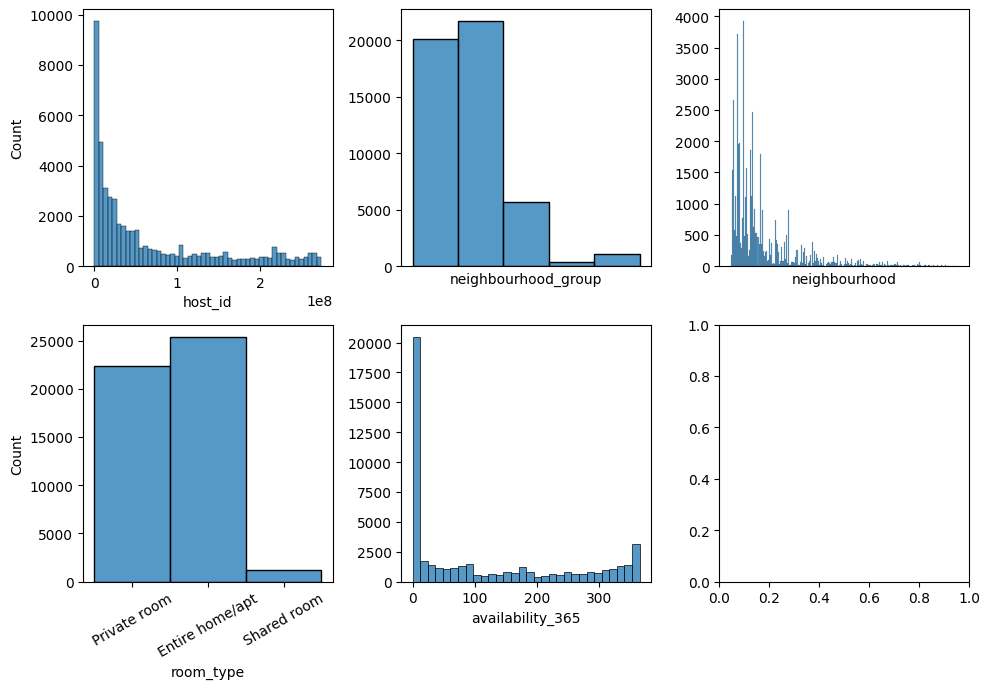

In [40]:
#ANALISIS VARIABLE UNIVARIANTE
#ANALISIS DE VARIABLES CATEGORICAS
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 3, figsize = (10, 7)) #SIGNIFCA QUE TIENE UN 2X3 PARA DIBUJAR EN UN TAMAÑO DE 10X7 PULG

sns.histplot(ax= axis[0,0],data=df,x='host_id') #AXIS [0,0] SIGNIFICA QUE SE DIBUJARA EN EL PRIMER ESPACIO
sns.histplot(ax= axis[0,1],data=df,x='neighbourhood_group').set(ylabel = None,xticks=[]) #set(ylabel = None,xticks=[]) OCULTA LAS ETIQUETAS Y X
sns.histplot(ax= axis[0,2],data=df,x='neighbourhood').set(ylabel = None,xticks=[])
sns.histplot(ax= axis[1,0],data=df,x='room_type').set_xticklabels(axis[1, 0].get_xticklabels(), rotation = 30) #SE HIZO ASÍ PORQUE SE VEIA MAL LAS ETIQUETAS, AHORA SE VEN EN UN ANGULO DE 30
sns.histplot(ax= axis[1,1],data=df,x='availability_365').set(ylabel = None)

plt.tight_layout()

plt.show()




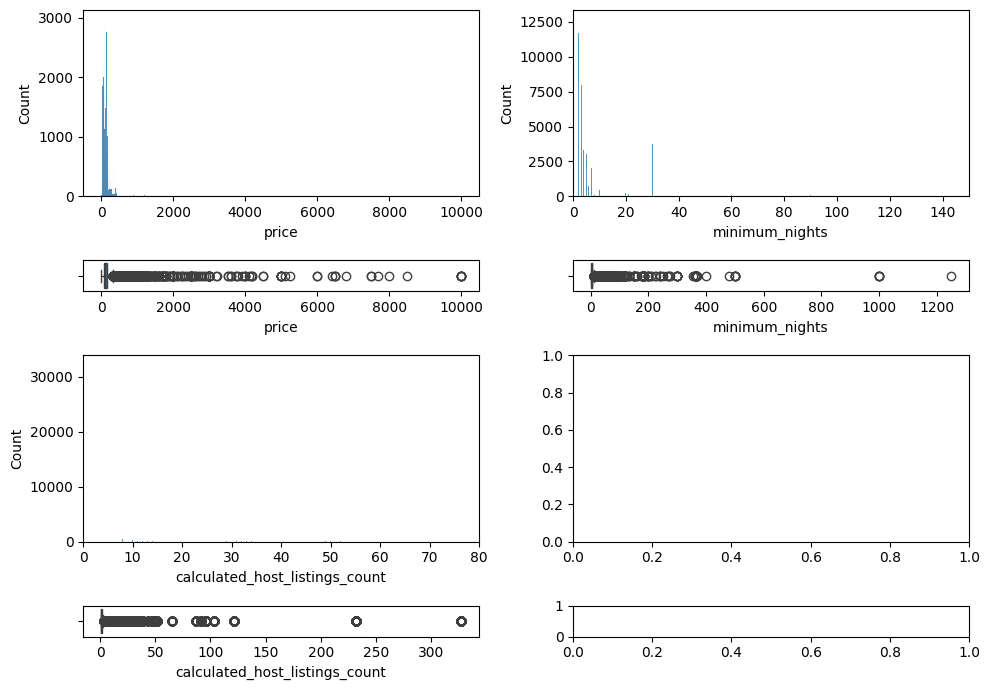

In [43]:
#ANALISIS VARIABLE UNIVARIANTE
#Variables númericas
#price, minimum_nights, calculated_host_listing_count
fig, axis = plt.subplots(4, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1,6,1]})

sns.histplot(ax=axis[0,0],data=df,x='price')
sns.boxplot(ax=axis[1,0],data=df,x='price')

sns.histplot(ax=axis[0,1],data=df,x='minimum_nights').set_xlim(0,150)
sns.boxplot(ax=axis[1,1],data=df,x='minimum_nights')

sns.histplot(ax=axis[2,0],data=df,x='calculated_host_listings_count').set_xlim(0,80)
sns.boxplot(ax=axis[3,0],data=df,x='calculated_host_listings_count')

plt.tight_layout()

plt.show()


<Axes: >

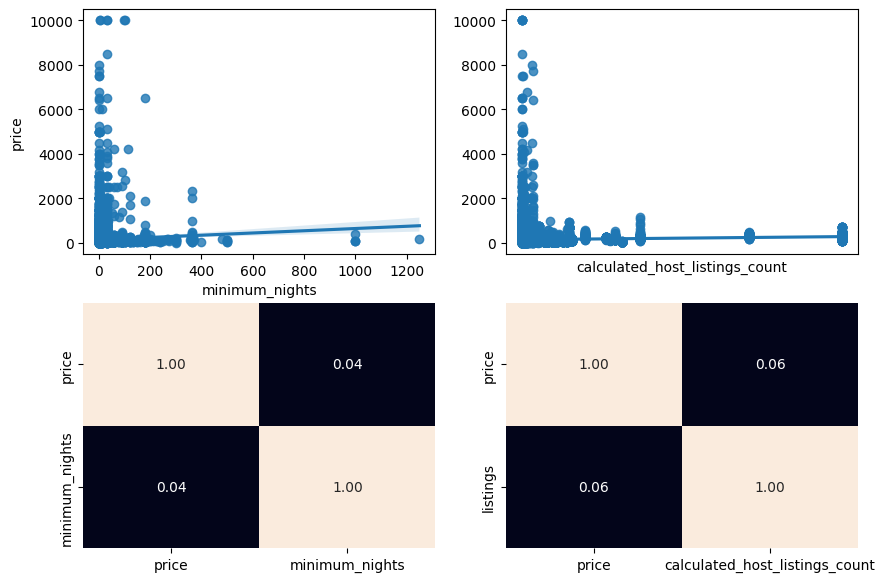

In [53]:
#ANALISIS VARIABLE MULTIVARIANTE
#NÚMERICO - NÚMERICO
fig, axis = plt.subplots(2, 2, figsize = (10, 7))
sns.regplot(ax=axis[0,0],data=df,x='minimum_nights',y='price')
sns.heatmap(df[['price','minimum_nights']].corr(),annot=True,fmt='.2f',ax=axis[1,0], cbar=False) #annot = correlacion de cada uno de los cuadritos

sns.regplot(ax=axis[0,1],data=df,x='calculated_host_listings_count',y='price').set(ylabel = None,xticks=[])
sns.heatmap(df[['price','calculated_host_listings_count']].corr(),annot=True,fmt='.2f',ax=axis[1,1], cbar=False,yticklabels=['price','listings'])